In [229]:
import pandas as pd

In [230]:
Dataset=pd.read_csv('kidney_disease.csv')

In [231]:
Dataset.shape

(400, 26)

In [232]:
Dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [233]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [234]:
Dataset.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [235]:
Dataset['bu'].dtype

dtype('float64')

In [236]:
def quanqual(Dataset):
    quan=[]
    qual=[]
    for columnName in Dataset.columns:
        if(Dataset[columnName].dtype=='O'):
            qual.append(columnName)
        else:
            quan.append(columnName)
    return quan,qual

In [237]:
quan,qual=quanqual(Dataset)

In [238]:
quan

['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [239]:
qual

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

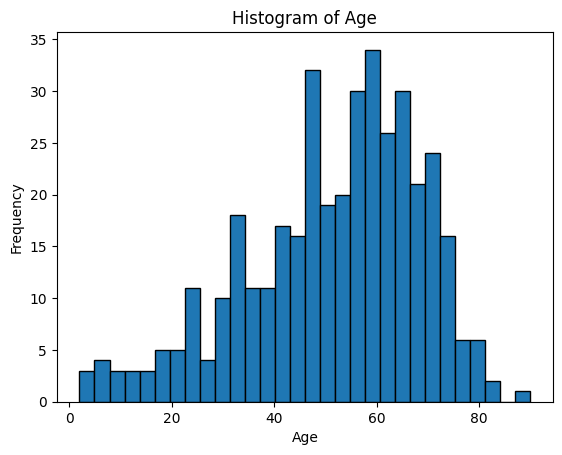

In [240]:
import matplotlib.pyplot as plt

plt.hist(Dataset['age'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [241]:
import numpy as np

In [242]:
descriptive=pd.DataFrame(index=['Mean','Median','Mode','Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR',
                                '1.5rule','Lesser','Greater','Min','Max'],columns=quan)
for columnName in quan:
    descriptive[columnName]['Mean']=Dataset[columnName].mean()
    descriptive[columnName]['Median']=Dataset[columnName].median()
    descriptive[columnName]['Mode']=Dataset[columnName].mode()[0]
    descriptive[columnName]['Q1:25%']=Dataset.describe()[columnName]['25%']
    descriptive[columnName]['Q2:50%']=Dataset.describe()[columnName]['50%']
    descriptive[columnName]['Q3:75%']=Dataset.describe()[columnName]['75%']
    descriptive[columnName]['99%']=np.percentile(Dataset[columnName],99)
    descriptive[columnName]['Q4:100%']=Dataset.describe()[columnName]['max']
    descriptive[columnName]['IQR']=descriptive[columnName]['Q3:75%']-descriptive[columnName]['Q1:25%']
    descriptive[columnName]['1.5rule']=1.5*descriptive[columnName]['IQR']
    descriptive[columnName]['Lesser']=descriptive[columnName]['Q1:25%']-descriptive[columnName]['1.5rule']
    descriptive[columnName]['Greater']=descriptive[columnName]['Q3:75%']+descriptive[columnName]['1.5rule']
    descriptive[columnName]['Min']=Dataset[columnName].min()
    descriptive[columnName]['Max']=Dataset[columnName].max()

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\1879450504.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]['Mean']=Dataset[columnName].mean()
C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\18794

In [243]:
descriptive

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
Mean,199.5,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
Median,199.5,55.0,80.0,1.02,0.0,0.0,121.0,42.0,1.3,138.0,4.4,12.65
Mode,0,60.0,80.0,1.02,0.0,0.0,99.0,46.0,1.2,135.0,3.5,15.0
Q1:25%,99.75,42.0,70.0,1.01,0.0,0.0,99.0,27.0,0.9,135.0,3.8,10.3
Q2:50%,199.5,55.0,80.0,1.02,0.0,0.0,121.0,42.0,1.3,138.0,4.4,12.65
Q3:75%,299.25,64.5,80.0,1.02,2.0,0.0,163.0,66.0,2.8,142.0,4.9,15.0
99%,395.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q4:100%,399.0,90.0,180.0,1.025,5.0,5.0,490.0,391.0,76.0,163.0,47.0,17.8
IQR,199.5,22.5,10.0,0.01,2.0,0.0,64.0,39.0,1.9,7.0,1.1,4.7
1.5rule,299.25,33.75,15.0,0.015,3.0,0.0,96.0,58.5,2.85,10.5,1.65,7.05


In [244]:
Dataset['age'].fillna(Dataset['age'].median(), inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\1473644048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['age'].fillna(Dataset['age'].median(), inplace=True)


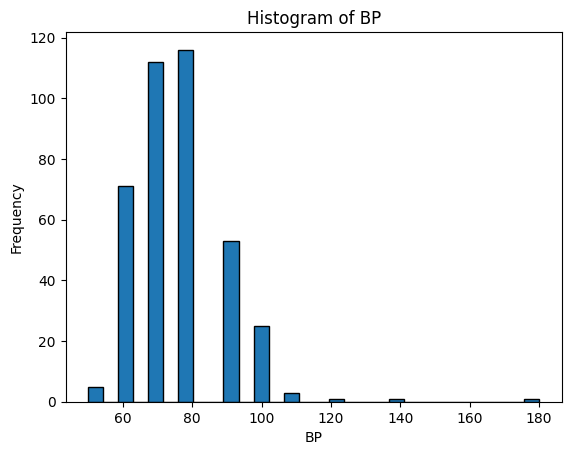

In [245]:
import matplotlib.pyplot as plt

plt.hist(Dataset['bp'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of BP')
plt.xlabel('BP')
plt.ylabel('Frequency')
plt.show()

In [246]:
Dataset['bp'].fillna(Dataset['bp'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\3011554537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['bp'].fillna(Dataset['bp'].median(),inplace=True)


<Axes: xlabel='sg', ylabel='Count'>

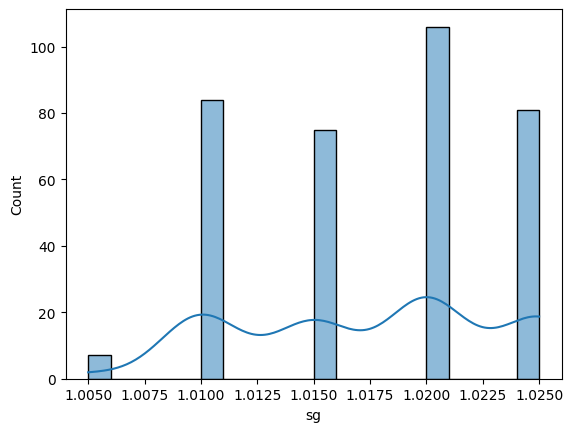

In [247]:
import seaborn as sns
sns.histplot(Dataset['sg'],bins=20, kde=True)

In [248]:
Dataset['sg'].fillna(Dataset['sg'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\1855461620.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['sg'].fillna(Dataset['sg'].median(),inplace=True)


<Axes: xlabel='al', ylabel='Count'>

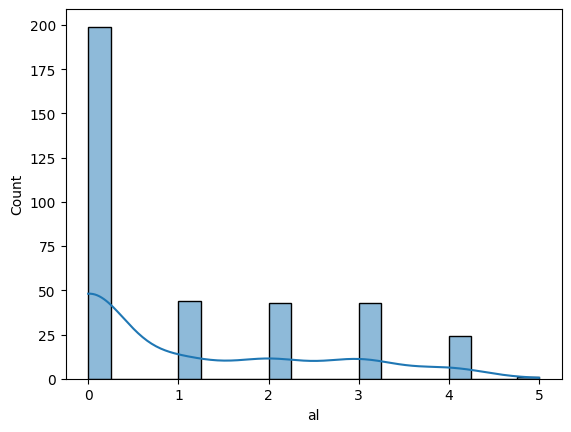

In [249]:
import seaborn as sns
sns.histplot(Dataset['al'].dropna(), kde=True, bins=20)

In [250]:
Dataset['al'].fillna(Dataset['al'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\4054200371.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['al'].fillna(Dataset['al'].median(),inplace=True)


<Axes: xlabel='su', ylabel='Count'>

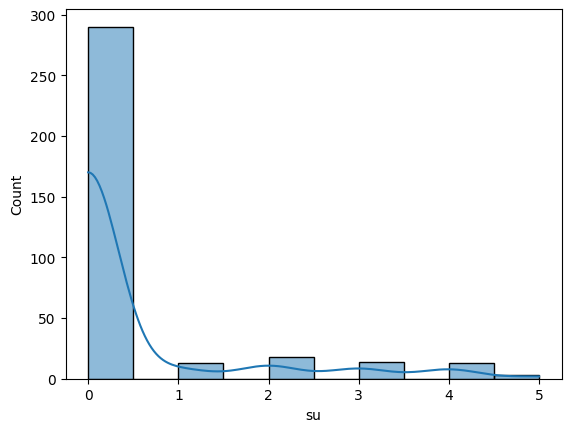

In [251]:
import seaborn as sns
sns.histplot(Dataset['su'], kde=True )

In [252]:
Dataset['su'].fillna(Dataset['su'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\3340623048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['su'].fillna(Dataset['su'].median(),inplace=True)


In [253]:
Dataset.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<Axes: xlabel='bgr', ylabel='Count'>

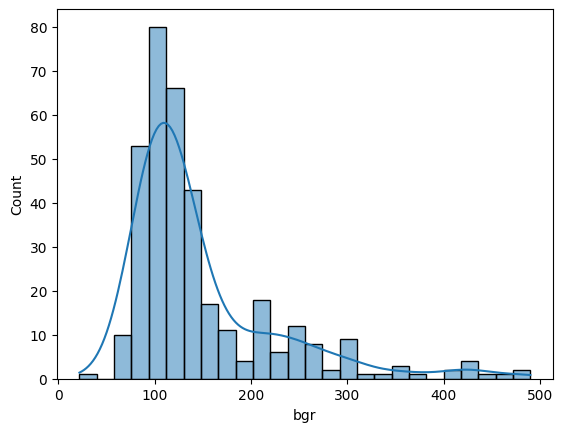

In [254]:
import seaborn as sns
sns.histplot(Dataset['bgr'],kde=True)

In [255]:
Dataset['bgr'].fillna(Dataset['bgr'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\2174150518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['bgr'].fillna(Dataset['bgr'].median(),inplace=True)


<Axes: xlabel='bu', ylabel='Count'>

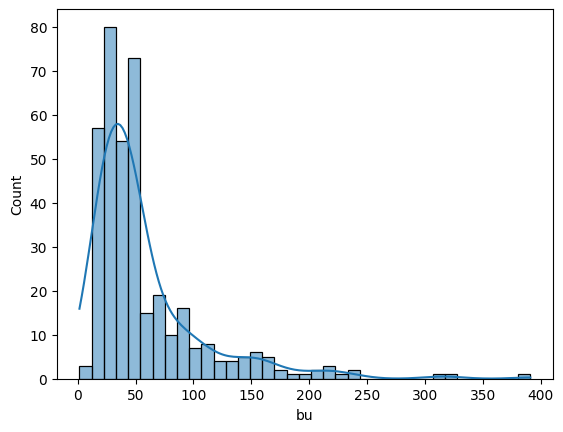

In [256]:
import seaborn as sns
sns.histplot(Dataset['bu'], kde=True)

In [257]:
Dataset['su'].fillna(Dataset['su'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\3340623048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['su'].fillna(Dataset['su'].median(),inplace=True)


<Axes: xlabel='sod', ylabel='Count'>

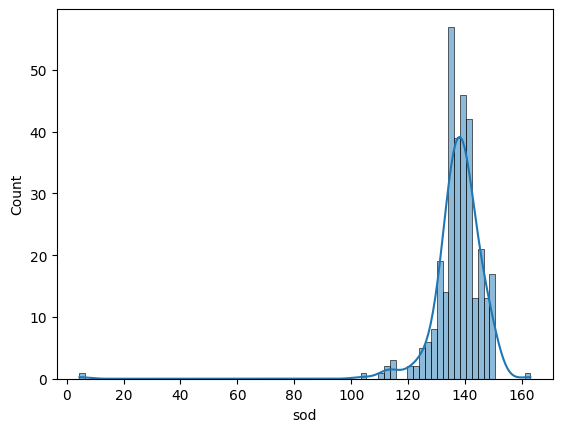

In [258]:
import seaborn as sns
sns.histplot(Dataset['sod'],kde=True)

In [259]:
Dataset['sod'].fillna(Dataset['sod'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\823374326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['sod'].fillna(Dataset['sod'].median(),inplace=True)


<Axes: xlabel='pot', ylabel='Count'>

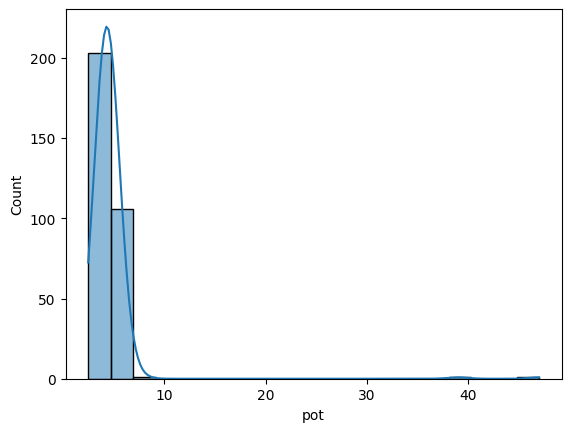

In [260]:
import seaborn as sns
sns.histplot(Dataset['pot'],kde=True, bins=20)

In [261]:
Dataset['pot'].mean()

4.62724358974359

In [262]:
Dataset['pot'].median()

4.4

In [263]:
Dataset['pot'].fillna(Dataset['pot'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\1828352391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['pot'].fillna(Dataset['pot'].median(),inplace=True)


<Axes: xlabel='hemo', ylabel='Count'>

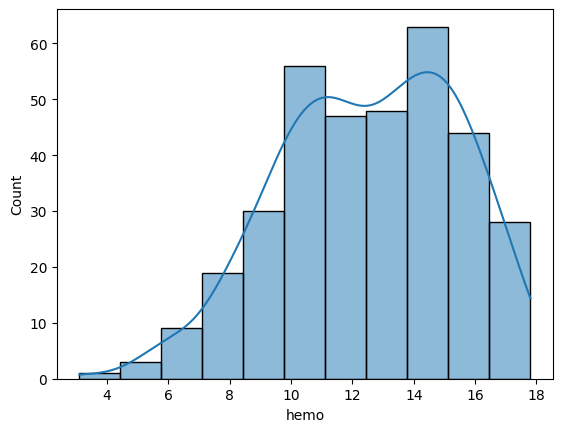

In [264]:
import seaborn as sns
sns.histplot(Dataset['hemo'],kde=True)

In [265]:
Dataset['hemo'].mean()

12.526436781609195

In [266]:
Dataset['hemo'].median()

12.649999999999999

In [267]:
Dataset['hemo'].fillna(Dataset['hemo'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\1944750358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['hemo'].fillna(Dataset['hemo'].median(),inplace=True)


<Figure size 1200x600 with 0 Axes>

c:\Users\Gajalakshmi G\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\Gajalakshmi G\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


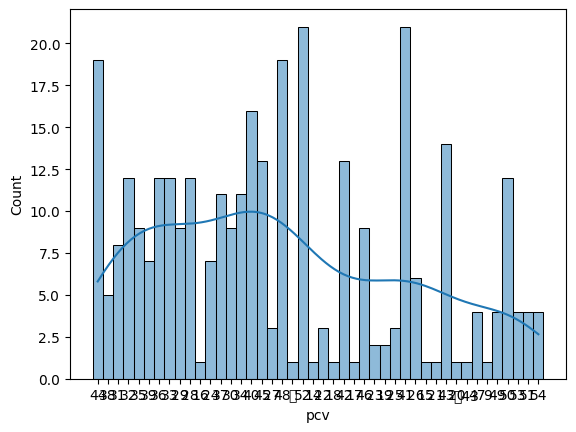

<Figure size 1200x600 with 0 Axes>

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(Dataset['pcv'],kde=True)
plt.figure(figsize=(12, 6))

In [269]:
Dataset['pcv'].dtype

dtype('O')

In [270]:
import numpy as np

# Replace '?' with NaN
Dataset['pcv'].replace('?', np.nan, inplace=True)



C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\2666993865.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['pcv'].replace('?', np.nan, inplace=True)


In [271]:
Dataset['pcv'] = pd.to_numeric(Dataset['pcv'], errors='coerce')


In [272]:
Dataset['pcv'].iloc[50:100]

50    28.0
51    33.0
52    34.0
53    40.0
54    40.0
55    28.0
56    30.0
57     NaN
58    33.0
59     NaN
60     NaN
61     NaN
62    33.0
63    27.0
64     NaN
65    48.0
66     NaN
67     NaN
68    37.0
69    52.0
70    44.0
71    28.0
72     NaN
73    14.0
74    29.0
75     NaN
76    36.0
77    34.0
78    30.0
79    40.0
80    31.0
81    29.0
82     NaN
83     NaN
84    22.0
85     NaN
86     NaN
87    32.0
88     NaN
89     NaN
90    40.0
91    52.0
92    33.0
93    30.0
94    36.0
95     NaN
96    36.0
97    32.0
98    18.0
99    32.0
Name: pcv, dtype: float64

In [273]:
Dataset['pcv'].mean()

38.88449848024316

In [274]:
Dataset['pcv'].median()

40.0

In [275]:
Dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200,5.9,no,no,no,good,no,no,notckd


In [276]:
Dataset['pcv'].fillna(Dataset['pcv'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\4096720762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['pcv'].fillna(Dataset['pcv'].median(),inplace=True)


In [277]:
Dataset['bu'].mean()

57.425721784776904

In [278]:
Dataset['bu'].median()

42.0

<Axes: xlabel='bu', ylabel='Count'>

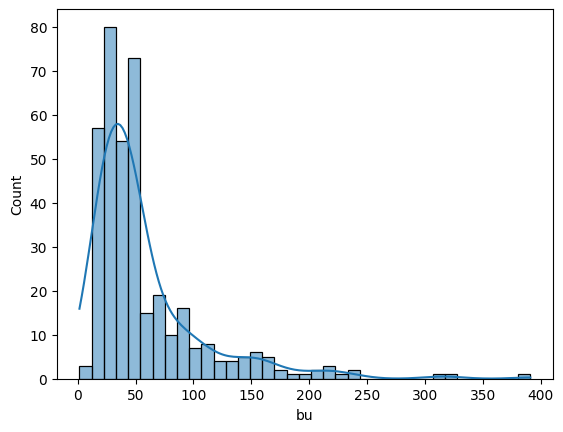

In [279]:
import seaborn as sns
sns.histplot(Dataset['bu'], kde=True)

In [280]:
Dataset['bu'].fillna(Dataset['bu'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\508275416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['bu'].fillna(Dataset['bu'].median(),inplace=True)


In [281]:
Dataset['su'].mean()

0.395

In [282]:
Dataset['su'].median()

0.0

<Axes: xlabel='su', ylabel='Count'>

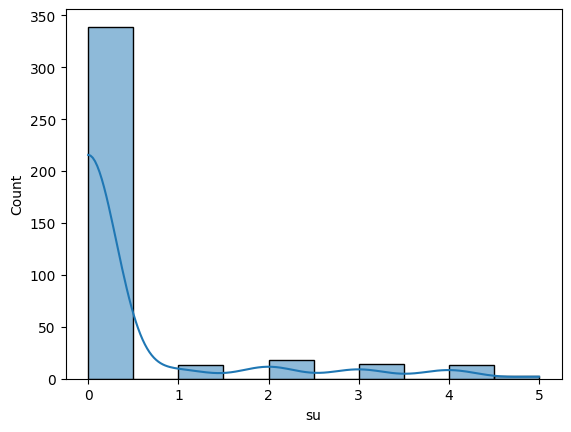

In [283]:
import seaborn as sns
sns.histplot(Dataset['su'], kde=True)

In [284]:
Dataset['su'].fillna(Dataset['su'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\3340623048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['su'].fillna(Dataset['su'].median(),inplace=True)


In [285]:
Dataset['su'].isnull().sum()

0

<Figure size 1200x1000 with 0 Axes>

c:\Users\Gajalakshmi G\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\Gajalakshmi G\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


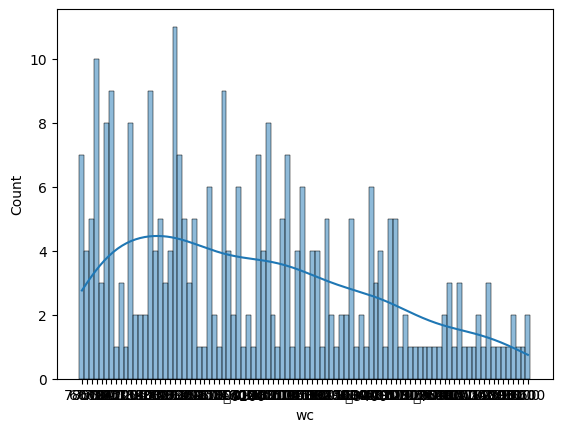

<Figure size 1200x1000 with 0 Axes>

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(Dataset['wc'], kde=True)
plt.figure(figsize=(12,10))

In [287]:
import numpy as np
Dataset['wc'].replace('?',np.nan, inplace=True)


C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\928079226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['wc'].replace('?',np.nan, inplace=True)


In [288]:
Dataset['wc'] =pd.to_numeric(Dataset['wc'], errors='coerce')


In [289]:
Dataset['wc'].fillna(Dataset['wc'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\2811033682.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['wc'].fillna(Dataset['wc'].median(),inplace=True)


<Axes: xlabel='rc', ylabel='Count'>

c:\Users\Gajalakshmi G\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\Gajalakshmi G\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


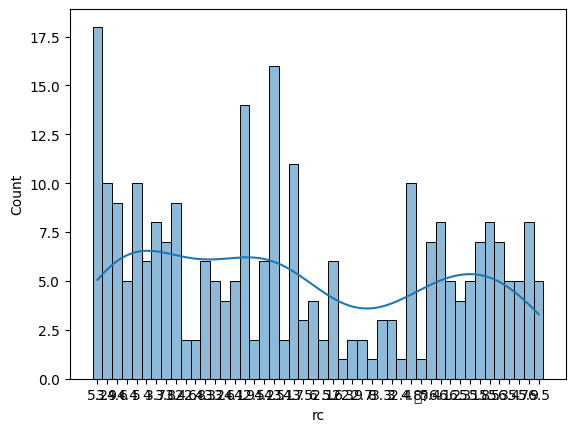

In [290]:
import seaborn as sns
sns.histplot(Dataset['rc'],kde=True)

In [291]:
Dataset['rc'].replace('?','np.nan',inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\2335085588.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['rc'].replace('?','np.nan',inplace=True)


In [292]:
Dataset['rc']=pd.to_numeric(Dataset['rc'], errors='coerce')

In [293]:
Dataset['rc'].fillna(Dataset['rc'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\3250026312.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['rc'].fillna(Dataset['rc'].median(),inplace=True)


In [294]:
Dataset[qual].isnull().sum()

rbc               152
pc                 65
pcc                 4
ba                  4
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [295]:
qual

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

<Axes: xlabel='count', ylabel='rbc'>

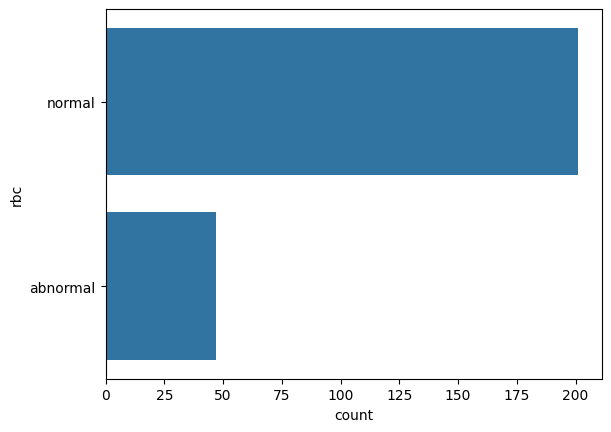

In [296]:
import seaborn as sns
sns.countplot(Dataset['rbc'])

In [297]:
Dataset['rbc'].fillna(Dataset['rbc'].mode()[0],inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\3979967797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['rbc'].fillna(Dataset['rbc'].mode()[0],inplace=True)


<Axes: xlabel='count', ylabel='pc'>

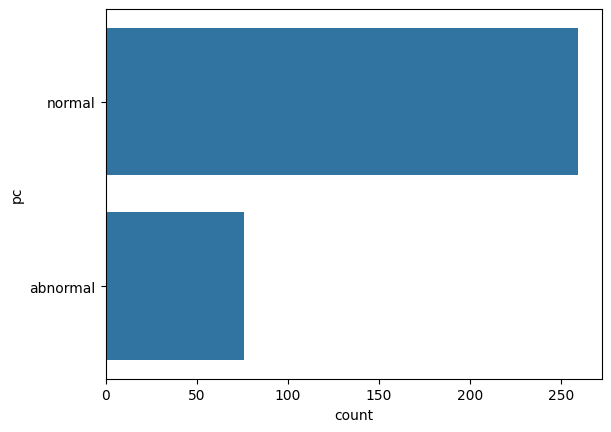

In [298]:
import seaborn as sns
sns.countplot(Dataset['pc'])

In [299]:
Dataset['pc'].fillna(Dataset['pc'].mode()[0],inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\633235474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['pc'].fillna(Dataset['pc'].mode()[0],inplace=True)


<Axes: ylabel='pcc'>

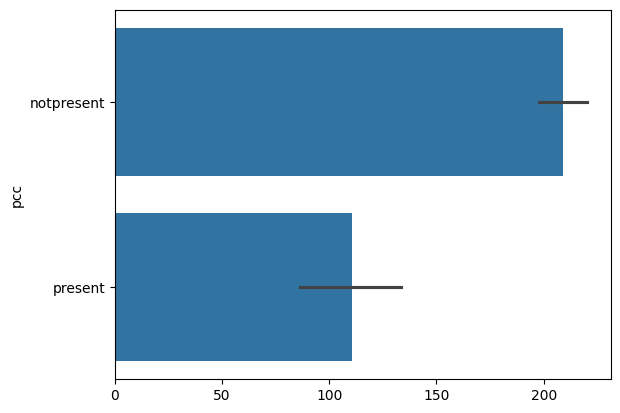

In [300]:
import seaborn as sns
sns.barplot(Dataset['pcc'])

In [301]:
Dataset['pcc'].fillna(Dataset['pcc'].mode()[0],inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\2223100331.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['pcc'].fillna(Dataset['pcc'].mode()[0],inplace=True)


<Axes: xlabel='count', ylabel='htn'>

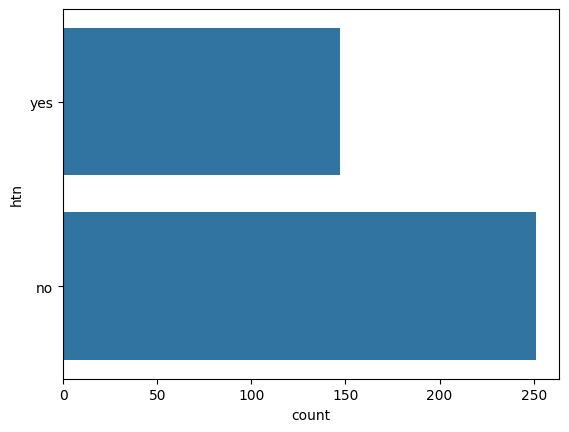

In [302]:
import seaborn as sns
sns.countplot(Dataset['htn'])

In [303]:
Dataset['htn'].fillna(Dataset['htn'].mode()[0],inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\2109616016.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['htn'].fillna(Dataset['htn'].mode()[0],inplace=True)


<Axes: xlabel='count', ylabel='dm'>

c:\Users\Gajalakshmi G\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\Gajalakshmi G\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


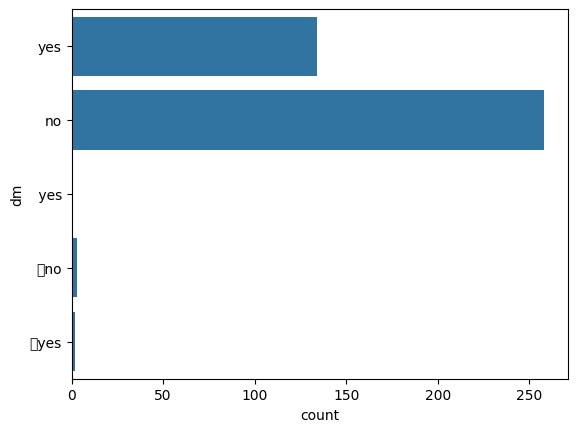

In [304]:
import seaborn as sns
sns.countplot(Dataset['dm'])

In [305]:
Dataset['dm'].fillna(Dataset['dm'].mode()[0],inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\465022999.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['dm'].fillna(Dataset['dm'].mode()[0],inplace=True)


<Axes: xlabel='count', ylabel='cad'>

c:\Users\Gajalakshmi G\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\Gajalakshmi G\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


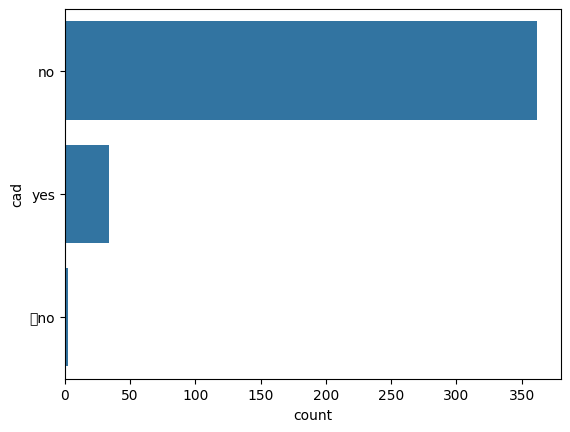

In [306]:
import seaborn as sns
sns.countplot(Dataset['cad'])

In [307]:
Dataset['cad'].fillna(Dataset['cad'].mode()[0],inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\2803801022.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['cad'].fillna(Dataset['cad'].mode()[0],inplace=True)


<Axes: xlabel='count', ylabel='appet'>

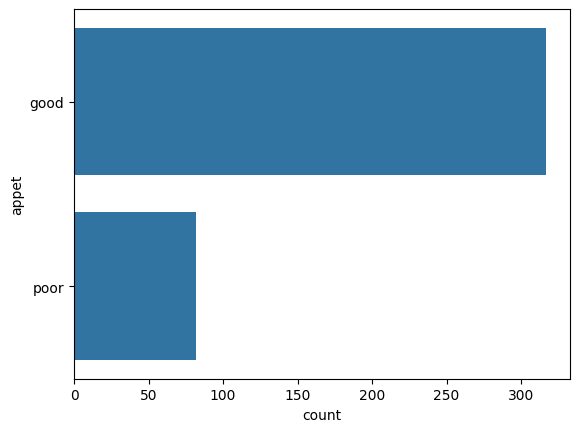

In [308]:
import seaborn as sns
sns.countplot(Dataset['appet'])

In [309]:
Dataset['appet'].fillna(Dataset['appet'].mode()[0],inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\3175068881.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['appet'].fillna(Dataset['appet'].mode()[0],inplace=True)


<Axes: xlabel='count', ylabel='pe'>

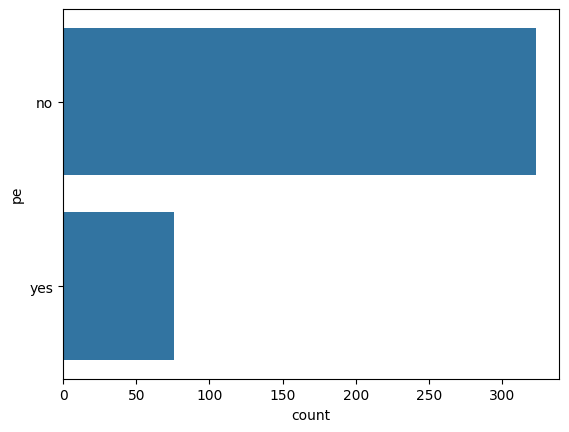

In [310]:
import seaborn as sns
sns.countplot(Dataset['pe'])

In [311]:
Dataset['pe'].fillna(Dataset['pe'].mode()[0],inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\1668904489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['pe'].fillna(Dataset['pe'].mode()[0],inplace=True)


<Axes: xlabel='count', ylabel='ane'>

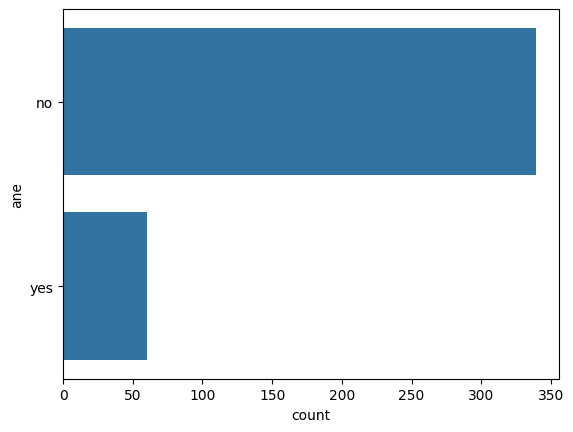

In [312]:
import seaborn as sns
sns.countplot(Dataset['ane'])

In [313]:
Dataset['ane'].fillna(Dataset['ane'].mode()[0],inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\2323428415.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['ane'].fillna(Dataset['ane'].mode()[0],inplace=True)


In [314]:
Dataset['ba'].fillna(Dataset['ba'].mode()[0],inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\3485097301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['ba'].fillna(Dataset['ba'].mode()[0],inplace=True)


In [315]:
Dataset['sc'].fillna(Dataset['sc'].median(),inplace=True)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\3945847243.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['sc'].fillna(Dataset['sc'].median(),inplace=True)


In [316]:
Dataset[qual].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [317]:
Dataset.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [318]:
Dataset[quan].isnull().sum()

id      0
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
dtype: int64

In [319]:
Dataset.iloc[50:90]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
50,50,53.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,28.0,11000.0,3.8,yes,yes,no,poor,yes,yes,ckd
51,51,54.0,100.0,1.015,3.0,0.0,normal,normal,present,notpresent,...,33.0,8000.0,4.8,yes,yes,no,poor,yes,no,ckd
52,52,53.0,90.0,1.015,0.0,0.0,normal,normal,notpresent,notpresent,...,34.0,4300.0,3.7,no,no,no,poor,no,yes,ckd
53,53,62.0,80.0,1.015,0.0,5.0,normal,normal,notpresent,notpresent,...,40.0,8500.0,4.7,yes,yes,no,good,no,no,ckd
54,54,63.0,80.0,1.010,2.0,2.0,normal,normal,notpresent,notpresent,...,40.0,9800.0,4.2,yes,no,yes,good,no,no,ckd
55,55,35.0,80.0,1.005,3.0,0.0,abnormal,normal,notpresent,notpresent,...,28.0,8000.0,4.8,no,no,no,good,yes,no,ckd
56,56,76.0,70.0,1.015,3.0,4.0,normal,abnormal,present,notpresent,...,30.0,11300.0,3.4,yes,yes,yes,poor,yes,no,ckd
57,57,76.0,90.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,40.0,8000.0,4.8,yes,yes,yes,poor,no,no,ckd
58,58,73.0,80.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,33.0,7200.0,4.3,yes,yes,yes,good,no,no,ckd
59,59,59.0,100.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,40.0,8000.0,4.8,yes,yes,no,good,no,yes,ckd


In [320]:
import numpy as np

In [321]:
def Finding_outliers(descriptive,quan):
    Lesser=[]
    Greater=[]
    for ColumnName in quan:
        if descriptive[ColumnName]['Min']<descriptive[ColumnName]['Lesser']:
            Lesser.append(ColumnName)
        if descriptive[ColumnName]['Max']>descriptive[columnName]['Greater']:
            Greater.append(ColumnName)
    
    return Lesser,Greater

In [322]:
Lesser,Greater=Finding_outliers(descriptive,quan)
print('Lesser:',Lesser)
print('Greater',Greater)

Lesser: ['age', 'bp', 'sod', 'hemo']
Greater ['id', 'age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot']


In [323]:
import numpy as np

In [324]:
def Handle_outliers(Dataset,descriptive,quan):
    Lesser,Greater=Finding_outliers(descriptive,quan)
    for columnName in Lesser:
    # Set values in Dataset based on the Lesser condition
        Dataset.loc[Dataset[columnName] < descriptive[columnName]['Lesser'], columnName] = descriptive[columnName]['Lesser']

    for columnName in Greater:
    # Set values in Dataset based on the Greater condition
        Dataset.loc[Dataset[columnName] > descriptive[columnName]['Greater'], columnName] = descriptive[columnName]['Greater']

    return Dataset

In [325]:
Handle_outliers(Dataset,descriptive,quan)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\2174602057.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '598.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Dataset.loc[Dataset[columnName] > descriptive[columnName]['Greater'], columnName] = descriptive[columnName]['Greater']


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.00,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1.0,8.25,55.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,2.0,62.00,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,3.0,48.00,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.00,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.00,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,396.0,42.00,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,397.0,12.00,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,398.0,17.00,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [326]:
def Univariate(Dataset,quan):
    descriptive=pd.DataFrame(index=['Mean','Median','Mode','Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR',
                                '1.5rule','Lesser','Greater','Min','Max','Kurtosis','skew'],columns=quan)
    for columnName in quan:
        descriptive[columnName]['Mean']=Dataset[columnName].mean()
        descriptive[columnName]['Median']=Dataset[columnName].median()
        descriptive[columnName]['Mode']=Dataset[columnName].mode()[0]
        descriptive[columnName]['Q1:25%']=Dataset.describe()[columnName]['25%']
        descriptive[columnName]['Q2:50%']=Dataset.describe()[columnName]['50%']
        descriptive[columnName]['Q3:75%']=Dataset.describe()[columnName]['75%']
        descriptive[columnName]['99%']=np.percentile(Dataset[columnName],99)
        descriptive[columnName]['Q4:100%']=Dataset.describe()[columnName]['max']
        descriptive[columnName]['IQR']=descriptive[columnName]['Q3:75%']-descriptive[columnName]['Q1:25%']
        descriptive[columnName]['1.5rule']=1.5*descriptive[columnName]['IQR']
        descriptive[columnName]['Lesser']=descriptive[columnName]['Q1:25%']-descriptive[columnName]['1.5rule']
        descriptive[columnName]['Greater']=descriptive[columnName]['Q3:75%']+descriptive[columnName]['1.5rule']
        descriptive[columnName]['Min']=Dataset[columnName].min()
        descriptive[columnName]['Max']=Dataset[columnName].max()
        descriptive[columnName]['Kurtosis']=Dataset[columnName].kurtosis()
        descriptive[columnName]['skew']=Dataset[columnName].skew()

    return descriptive

In [327]:
Lesser,Greater=Finding_outliers(descriptive,quan)
print('Lesser:',Lesser)
print('Greater',Greater)

Lesser: ['age', 'bp', 'sod', 'hemo']
Greater ['id', 'age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot']


In [328]:
def FreqTable(columnName,Dataset):
    FreqTable=pd.DataFrame(columns=['unique_Values','Frequency','Relative_Frequency','cummulative_Frequency or cumsum'])
    FreqTable['unique_values']=Dataset[columnName].value_counts().index
    FreqTable['Frequency']=Dataset[columnName].value_counts().values
    total_count=len(Dataset[columnName])
    FreqTable['Relative_Frequency']=FreqTable['Frequency']/total_count
    FreqTable['cumulative_Frequency or cusum']=FreqTable['Relative_Frequency'].cumsum()

    return FreqTable

In [329]:
def ReplaceOutlier(Dataset,Lesser,Greater):
    for columnName in Lesser:
        Dataset[columnName][Dataset[columnName]<descriptive[columnName]['Lesser']]=descriptive[columnName]['Lesser']
    for columnName in Greater:
        Dataset[columnName][Dataset[columnName]>descriptive[columnName]['Greater']]=descriptive[columnName]['Greater']

    return Lesser,Greater

In [330]:
ReplaceOutlier(Dataset,Lesser,Greater)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\782725309.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Dataset[columnName][Dataset[columnName]<descriptive[columnName]['Lesser']]=descriptive[columnName]['Lesser']
C:\Users\Gaja

(['age', 'bp', 'sod', 'hemo'],
 ['id', 'age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot'])

In [331]:
Univariate(Dataset,quan)

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\3377901227.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]['Mean']=Dataset[columnName].mean()
C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\33779

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
Mean,199.5,51.62875,75.825,1.017712,0.9,0.395,137.885,51.3005,2.096,138.1625,4.39225,12.542875
Median,199.5,55.0,80.0,1.02,0.0,0.0,121.0,42.0,1.3,138.0,4.4,12.65
Mode,0.0,55.0,80.0,1.02,0.0,0.0,121.0,124.5,5.65,138.0,4.4,12.65
Q1:25%,99.75,42.0,70.0,1.015,0.0,0.0,101.0,27.0,0.9,135.0,4.0,10.875
Q2:50%,199.5,55.0,80.0,1.02,0.0,0.0,121.0,42.0,1.3,138.0,4.4,12.65
Q3:75%,299.25,64.0,80.0,1.02,2.0,0.0,150.0,61.75,2.725,141.0,4.8,14.625
99%,395.01,80.01,95.0,1.025,4.0,4.0,259.0,124.5,5.65,150.0,6.5005,17.601
Q4:100%,399.0,90.0,95.0,1.025,5.0,5.0,259.0,124.5,5.65,152.5,6.55,17.8
IQR,199.5,22.0,10.0,0.005,2.0,0.0,49.0,34.75,1.825,6.0,0.8,3.75
1.5rule,299.25,33.0,15.0,0.0075,3.0,0.0,73.5,52.125,2.7375,9.0,1.2,5.625


In [332]:
descriptive

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
Mean,199.5,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
Median,199.5,55.0,80.0,1.02,0.0,0.0,121.0,42.0,1.3,138.0,4.4,12.65
Mode,0,60.0,80.0,1.02,0.0,0.0,99.0,46.0,1.2,135.0,3.5,15.0
Q1:25%,99.75,42.0,70.0,1.01,0.0,0.0,99.0,27.0,0.9,135.0,3.8,10.3
Q2:50%,199.5,55.0,80.0,1.02,0.0,0.0,121.0,42.0,1.3,138.0,4.4,12.65
Q3:75%,299.25,64.5,80.0,1.02,2.0,0.0,163.0,66.0,2.8,142.0,4.9,15.0
99%,395.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q4:100%,399.0,90.0,180.0,1.025,5.0,5.0,490.0,391.0,76.0,163.0,47.0,17.8
IQR,199.5,22.5,10.0,0.01,2.0,0.0,64.0,39.0,1.9,7.0,1.1,4.7
1.5rule,299.25,33.75,15.0,0.015,3.0,0.0,96.0,58.5,2.85,10.5,1.65,7.05


In [333]:
lesser=[]
greater=[]
for colunName in quan:
    if(descriptive[colunName]['Min']<descriptive[colunName]['Lesser']):
        lesser.append(colunName)
    if(descriptive[colunName]['Max']>descriptive[colunName]['Greater']):
        greater.append(colunName)

In [334]:
lesser

['age', 'bp', 'sod', 'hemo']

In [335]:
Dataset[columnName][Dataset[columnName]<descriptive[colunName]['Lesser']]=descriptive[colunName]['Lesser']

C:\Users\Gajalakshmi G\AppData\Local\Temp\ipykernel_3696\214986892.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Dataset[columnName][Dataset[columnName]<descriptive[colunName]['Lesser']]=descriptive[colunName]['Lesser']
C:\Users\Gajala

In [336]:
greater

['bp', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot']

Replacing Outliers

In [337]:
lesser

['age', 'bp', 'sod', 'hemo']

In [338]:
quan

['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [340]:
Dataset.to_csv('outputfile.csv',index=False)